--- [Step 0: Installing and Importing Libraries] ---
Cloning into 'Amthal'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 76 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 1.47 MiB | 3.43 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Amthal
--- [Step 1: Loading Data] ---
Data loaded successfully. Found 4078 instances.

Calculating relative distribution of Valence for each period...
Generating the 100% stacked bar chart...


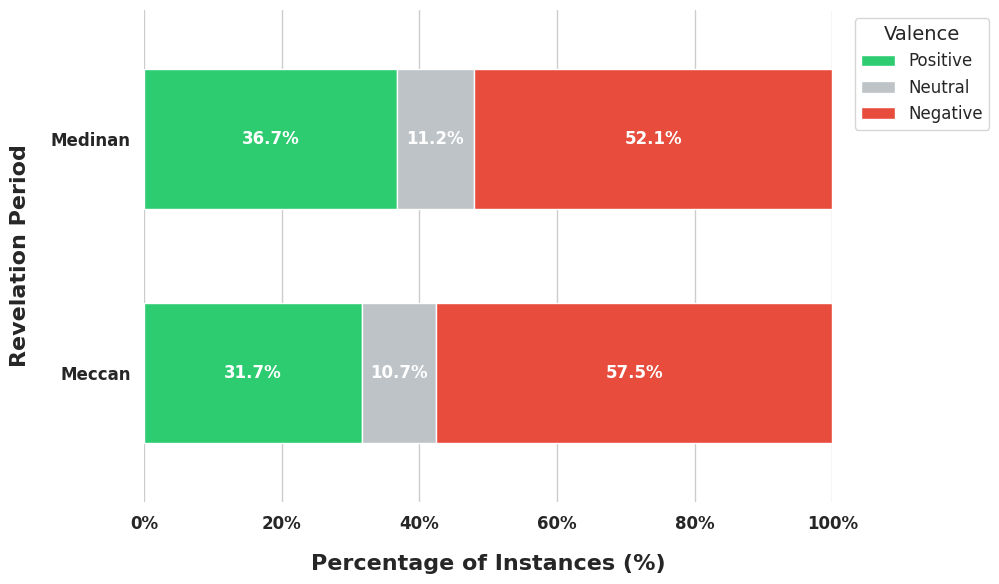

In [1]:
#@title  **Valence Distribution.**

# --- [الخطوة 0: التثبيت والاستيراد] ---
print("--- [Step 0: Installing and Importing Libraries] ---")
!git clone https://github.com/NoorBayan/Amthal.git
%cd Amthal
from utility import *
from IPython.display import display, HTML, clear_output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- [الخطوة 1: تحميل وتجهيز البيانات] ---
print("--- [Step 1: Loading Data] ---")
# ⚠️⚠️⚠️  الرجاء التأكد من أن هذا المسار صحيح في بيئتك
INSTANCES_FILE_PATH = '/content/Amthal/data/processed/instances.csv'
try:
    df = pd.read_csv(INSTANCES_FILE_PATH, sep='\t', encoding='utf-16')
    df['Dominant_Concept']=[Dominant_Concept_dic[i]['en'] for i in df.Dominant_Concept]
    df['Valence']=[Valence_dic[i]['ar'] for i in df.Valence]
    df['Revelation_Phase']=[Revelation_Phase_dic[i]['ar'] for i in df.Revelation_Phase]

    print(f"Data loaded successfully. Found {len(df)} instances.\n")
except FileNotFoundError:
    print(f"⚠️ ERROR: File not found at '{INSTANCES_FILE_PATH}'. Please check the path and try again.")
    exit()





# --- 1. تحميل وتجهيز البيانات الكاملة ---

# ترجمة عمود Valence إلى الإنجليزية
valence_map = {'إيجابي': 'Positive', 'سلبي': 'Negative', 'محايد': 'Neutral'}
df['Valence_En'] = df['Valence'].map(valence_map)

# *** الخطوة الجديدة: ترجمة عمود Revelation_Phase إلى الإنجليزية ***
phase_map = {'مكي': 'Meccan', 'مدني': 'Medinan'}
df['Revelation_Phase_En'] = df['Revelation_Phase'].map(phase_map)


# --- 2. حساب التوزيع النسبي للشحنات (باستخدام العمود المترجم) ---
print("Calculating relative distribution of Valence for each period...")

# نستخدم الآن العمود المترجم 'Revelation_Phase_En'
period_valence_counts = pd.crosstab(df['Revelation_Phase_En'], df['Valence_En'])

# (بقية كود الحساب يبقى كما هو)
period_valence_props = period_valence_counts.div(period_valence_counts.sum(axis=1), axis=0) * 100
period_valence_props = period_valence_props[['Positive', 'Neutral', 'Negative']]

# فرز الفهرس لضمان أن 'Meccan' يأتي قبل 'Medinan'
period_valence_props = period_valence_props.reindex(['Meccan', 'Medinan'])


# --- 3. إعداد الرسم البياني الاحترافي (لا تغيير هنا) ---
print("Generating the 100% stacked bar chart...")
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

colors = {'Positive': '#2ecc71', 'Neutral': '#bdc3c7', 'Negative': '#e74c3c'}
period_valence_props.plot(
    kind='barh',
    stacked=True,
    color=[colors[col] for col in period_valence_props.columns],
    ax=ax,
    width=0.6,
    edgecolor='white'
)

# --- 4 & 5. إضافة التحسينات البصرية والحفظ ---
ax.set_xlabel(
    'Percentage of Instances (%)',
    fontsize=16,           # حجم أصغر قليلاً
    fontweight='bold',
    labelpad=15
)
ax.set_ylabel(
    'Revelation Period',
    fontsize=16,
    fontweight='bold',
    labelpad=15
)

# تنسيق القيم على المحورين
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# جعل النصوص على المحاور بخط عريض
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# تنسيق قيم المحور السيني كنسبة مئوية
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax.set_xlim(0, 100)

# إضافة النسب المئوية داخل الأعمدة بخط أصغر وواضح
for c in ax.containers:
    ax.bar_label(
        c,
        fmt='%.1f%%',
        label_type='center',
        color='white',
        fontsize=12,       # حجم أصغر مناسب
        fontweight='bold'
    )

# تحسين الأسطورة (Legend)
ax.legend(
    title='Valence',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=12,
    title_fontsize=14
)

# إزالة الإطار الجانبي
sns.despine(left=True, bottom=True)

# ضبط المسافات النهائية والعرض
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('Valence_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()
